# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info (including a 'valid' cities list to remove items that failed)
cities_valid = []
lat = []
lng = []
temp = []
clouds = []
wind = []
country = []
humidity = []
max_temp = []
date = []

#count variable for reduction in index
count = 0

#total length of 'cities' variable for reporting
len_cities = len(cities)

# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities,start=1):
    try:
        response = requests.get(query_url + city).json()
        cities_valid.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        max_temp.append(response['main']['temp_max'])
        date.append(response['dt'])
        #reduce index based on the number of cities not found
        index = index - count
        print(f'Processing record #{index} | Name: {city}')
    except KeyError:
        print("City not found. Skipping...")
        #variable to total the number of cities not found (and reduce index accordingly)
        count = count + 1

print(f"---------------------------------------------------------------------------------------------------------------")
print(f"Data Retrieval Complete -- {len_cities} total records | {index} records located | {count} records not found")
print(f"---------------------------------------------------------------------------------------------------------------")

Processing record #1 | Name: rikitea
City not found. Skipping...
Processing record #2 | Name: tuktoyaktuk
Processing record #3 | Name: matamoros
Processing record #4 | Name: severo-kurilsk
Processing record #5 | Name: vila franca do campo
Processing record #6 | Name: bluff
Processing record #7 | Name: rawah
City not found. Skipping...
Processing record #8 | Name: nikel
Processing record #9 | Name: hay river
Processing record #10 | Name: westport
Processing record #11 | Name: amahai
Processing record #12 | Name: krasnoselkup
Processing record #13 | Name: atuona
City not found. Skipping...
Processing record #14 | Name: phibun mangsahan
City not found. Skipping...
Processing record #15 | Name: surskoye
Processing record #16 | Name: saint george
Processing record #17 | Name: kapaa
Processing record #18 | Name: yarim
Processing record #19 | Name: ushuaia
Processing record #20 | Name: nizhniy kuranakh
Processing record #21 | Name: cape town
Processing record #22 | Name: barcelos
Processing r

Processing record #191 | Name: bandarbeyla
Processing record #192 | Name: torbay
Processing record #193 | Name: san rafael
Processing record #194 | Name: phangnga
Processing record #195 | Name: bonthe
Processing record #196 | Name: pedernales
Processing record #197 | Name: tuy hoa
Processing record #198 | Name: akyab
Processing record #199 | Name: tuatapere
Processing record #200 | Name: xinzhou
Processing record #201 | Name: san quintin
Processing record #202 | Name: vanimo
Processing record #203 | Name: antofagasta
Processing record #204 | Name: ust-kuyga
Processing record #205 | Name: sobolevo
Processing record #206 | Name: erenhot
Processing record #207 | Name: port alfred
Processing record #208 | Name: huambo
Processing record #209 | Name: honningsvag
Processing record #210 | Name: balakhninskiy
Processing record #211 | Name: tasiilaq
Processing record #212 | Name: belyy yar
Processing record #213 | Name: maningrida
City not found. Skipping...
Processing record #214 | Name: dikson

Processing record #385 | Name: gushikawa
Processing record #386 | Name: novikovo
Processing record #387 | Name: moron
Processing record #388 | Name: itarema
Processing record #389 | Name: apache junction
Processing record #390 | Name: penzance
City not found. Skipping...
Processing record #391 | Name: kavaratti
Processing record #392 | Name: ixtapa
Processing record #393 | Name: ordu
Processing record #394 | Name: muzaffarpur
Processing record #395 | Name: eresos
Processing record #396 | Name: novyy urengoy
Processing record #397 | Name: lujan
Processing record #398 | Name: grand-lahou
Processing record #399 | Name: frontera
Processing record #400 | Name: hearst
Processing record #401 | Name: rameswaram
Processing record #402 | Name: carpentras
Processing record #403 | Name: lensk
City not found. Skipping...
Processing record #404 | Name: hamilton
Processing record #405 | Name: kurumkan
Processing record #406 | Name: ahipara
City not found. Skipping...
Processing record #407 | Name: ku

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create data variable to hold list variables (populated in cell above) for dataframe creation
data = {'City':cities_valid,
        'Cloudiness': clouds, 
        'Country':country,
        'Date':date,
        'Humidity':humidity,
        'Lat':lat,
        'Lng':lng,
        'Max_Temp':max_temp,
        'Wind_Speed':wind}

#create dataframe 'weather_call_df' using 'data' variable
weather_call_df = pd.DataFrame(data)

#export the data to a csv file
weather_call_df.to_csv('weather_call_data.csv')

In [6]:
#count number of entries in each field - aligning it to the count of records displayed as valid (568)
weather_call_df.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max_Temp      549
Wind_Speed    549
dtype: int64

In [7]:
#display 'weather_call_df' dataframe head
weather_call_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Rikitea,97,PF,1580703915,79,-23.12,-134.97,26.1,6.58
1,Tuktoyaktuk,5,CA,1580703915,73,69.45,-133.04,-38.0,3.10
2,Matamoros,75,MX,1580703913,48,25.53,-103.25,18.0,2.82
3,Severo-Kuril'sk,55,RU,1580703915,83,50.68,156.12,-7.5,4.43
4,Vila Franca do Campo,20,PT,1580703916,87,37.72,-25.43,10.0,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

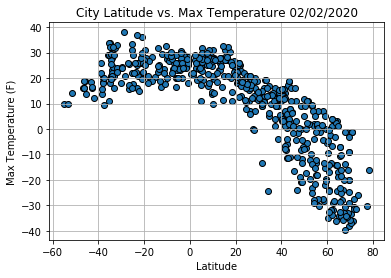

In [8]:
#Create Scatterplot of latitude versus max temperature with title, labels, gridlines
plt.scatter(weather_call_df['Lat'],weather_call_df['Max_Temp'],marker='o',edgecolors='black')
plt.title('City Latitude vs. Max Temperature 02/02/2020')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

#export scatterplot to png file
plt.savefig('Latitude vs. Temperature Plot.png')

#display scatterplot
plt.show()

#### Latitude vs. Humidity Plot

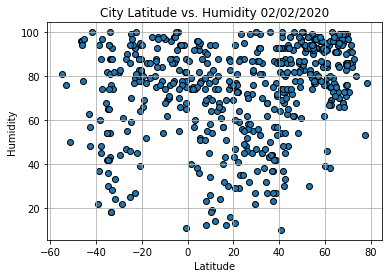

In [9]:
#Create Scatterplot of latitude versus humidity with title, labels, gridlines
plt.scatter(weather_call_df['Lat'],weather_call_df['Humidity'],marker='o',edgecolors='black')
plt.title('City Latitude vs. Humidity 02/02/2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

#export scatterplot to png file
plt.savefig('Latitude vs. Humidity Plot.png')

#display scatterplot
plt.show()

#### Latitude vs. Cloudiness Plot

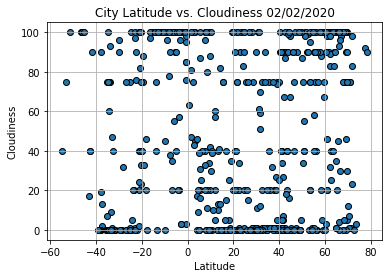

In [10]:
#Create Scatterplot of latitude versus cloudiness with title, labels, gridlines
plt.scatter(weather_call_df['Lat'],weather_call_df['Cloudiness'],marker='o',edgecolors='black')
plt.title('City Latitude vs. Cloudiness 02/02/2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

#export scatterplot to png file
plt.savefig('Latitude vs. Cloudiness Plot.png')

#display scatterplot
plt.show()

#### Latitude vs. Wind Speed Plot

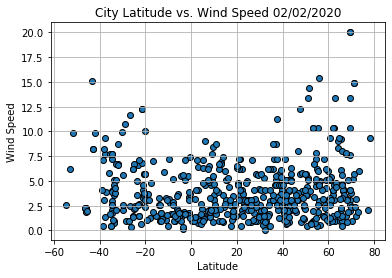

In [11]:
#Create Scatterplot of latitude versus wind speed with title, labels, gridlines
plt.scatter(weather_call_df['Lat'],weather_call_df['Wind_Speed'],marker='o',edgecolors='black')
plt.title('City Latitude vs. Wind Speed 02/02/2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

#export scatterplot to png file
plt.savefig('Latitude vs. Wind Speed Plot.png')

#display scatterplot
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots, save to PNG based on user-provided title, and show
def regress_lin(x,y):
    plt.scatter(x,y,edgecolors='black')
    ylim = min(y)
    xlim = min(x)
    title = input('Title for PNG file?')
    reg = linregress(x,y)
    plt.plot(x,x*reg[0]+reg[1],color='r')
    plt.text(xlim,ylim,f'y={reg[0]}x + {reg[1]}',color='r')
    plt.title(f'{str(x.name)} vs. {str(y.name)}')
    plt.xlabel(f'{str(x.name)}')
    plt.ylabel(f'{str(y.name)}')
    plt.grid()
    plt.savefig(f'{title}.png')
    plt.show()
    print(reg)
    return

In [13]:
# Create Northern Hemisphere DataFrames using conditional .loc
northern_df = weather_call_df.loc[weather_call_df['Lat'] > 0]

# Create Southern Hemisphere DataFrames using conditional .loc
southern_df = weather_call_df.loc[weather_call_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Title for PNG file?####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


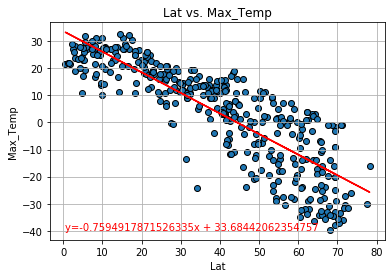

LinregressResult(slope=-0.7594917871526335, intercept=33.68442062354757, rvalue=-0.8478151104729897, pvalue=1.1651487974364236e-108, stderr=0.024148016868749934)


In [14]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(northern_df['Lat'],northern_df['Max_Temp'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Title for PNG file?Southern Hemisphere - Max Temp vs. Latitude Linear Regression


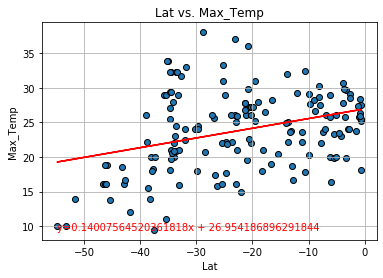

LinregressResult(slope=0.14007564520361818, intercept=26.954186896291844, rvalue=0.33949039661274333, pvalue=1.1245267380753277e-05, stderr=0.030875639732547793)


In [15]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(southern_df['Lat'],southern_df['Max_Temp'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Title for PNG file?Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


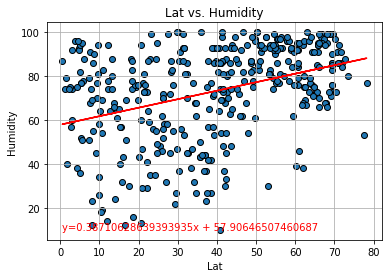

LinregressResult(slope=0.38710628639393935, intercept=57.90646507460687, rvalue=0.37140552437972935, pvalue=3.610283966988481e-14, stderr=0.049192014671425366)


In [16]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(northern_df['Lat'],northern_df['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Title for PNG file?Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


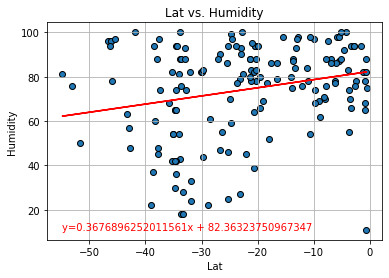

LinregressResult(slope=0.3676896252011561, intercept=82.36323750967347, rvalue=0.2366957271457762, pvalue=0.002582902879389317, stderr=0.12007226172648872)


In [17]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(southern_df['Lat'],southern_df['Humidity'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Title for PNG file?Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


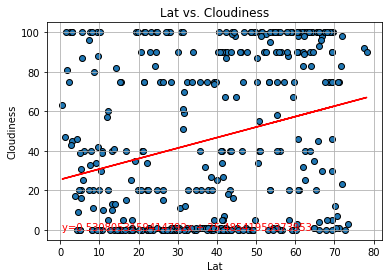

LinregressResult(slope=0.5308053159414792, intercept=25.48541959373953, rvalue=0.2640203668606294, pvalue=1.2598198026410413e-07, stderr=0.09857170868607022)


In [18]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(northern_df['Lat'],northern_df['Cloudiness'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Title for PNG file?Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


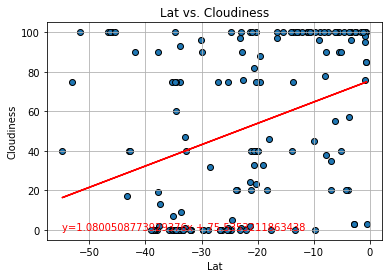

LinregressResult(slope=1.0800508773929376, intercept=75.5353211863438, rvalue=0.3497456362296444, pvalue=5.80723990183315e-06, stderr=0.2301605940330514)


In [19]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(southern_df['Lat'],southern_df['Cloudiness'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Title for PNG file?Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


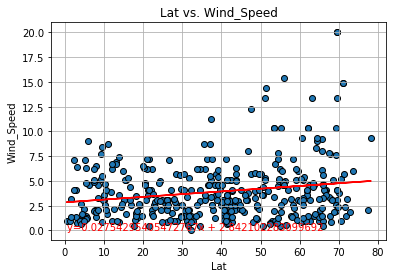

LinregressResult(slope=0.02754295405472767, intercept=2.842102283099692, rvalue=0.1925403731261093, pvalue=0.00013286803998201706, stderr=0.0071355947920185795)


In [20]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(northern_df['Lat'],northern_df['Wind_Speed'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Title for PNG file?Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


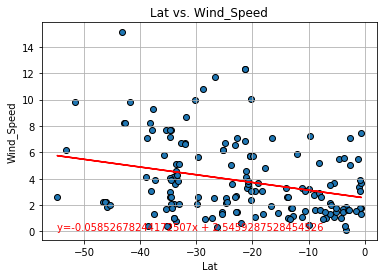

LinregressResult(slope=-0.05852678244172507, intercept=2.5459287528454526, rvalue=-0.27956877011835674, pvalue=0.00034329390913501656, stderr=0.01599062840051037)


In [21]:
#use created function to generate scatterplot with line - function autosaves PNG file based on user input for title
regress_lin(southern_df['Lat'],southern_df['Wind_Speed'])